In [3]:
import numpy as np

# Week 2

## Matrix

### Dense Matrix & Sparse Matrix CSR, CSC, COO

In [4]:
from scipy.sparse import coo_matrix, csr_matrix, csc_matrix

ModuleNotFoundError: No module named 'scipy'

### Identity Matrix

In [ ]:
from scipy.sparse import eye
I = eye(3, format='csr')
print(I)

  (np.int32(0), np.int32(0))	1.0
  (np.int32(1), np.int32(1))	1.0
  (np.int32(2), np.int32(2))	1.0


### allclose

In [ ]:
A = np.array([[1, 0, 0], [0, 2, 0], [0, 0, 3]])
B = np.array([[3, 0, 0], [0, 2, 0], [0, 0, 1]])
np.allclose(np.dot(A, B), np.dot(B, A))

In [ ]:
np.allclose(A*B, B*A)

True

#### Gauss Elimination

In [ ]:
"""
Two steps of Gauss Elimination:
1. Get upper triangle matrix
2. Back substitution
"""

### Linear Algebra

In [ ]:
"""
x+y+2=7
x+y-z=5
-x-y+x=3
"""

from scipy.linalg import solve

A = np.array([[1, 1, 1],
              [1, 1, -1],
              [-1, -1, 0]])

b = np.array([7, 5, 3])

x = solve(A, b)
print(x)

LinAlgError: Matrix is singular.

### Elimination Matrix

### Augmented Matrix

In [ ]:
import numpy as np
from numba import jit
import time

@jit
def matrix_multiply(A, B):
    a, b = A.shape
    c, d = B.shape

    C = np.zeros((a, d), dtype=A.dtype)

    for i in range(a):
        for j in range(d):
            s = 0.0
            for l in range(b):
                s += A[i, l] * B[l, j]
            C[i, j] = s

    return C

In [2]:
A = np.random.rand(999, 999)
B = np.random.rand(999, 999)

In [3]:
%%timeit
C_numba = matrix_multiply(A, B)

914 ms ± 18.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%%timeit
C_numpy = A @ B

25 ms ± 911 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Week 4

## ODE

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

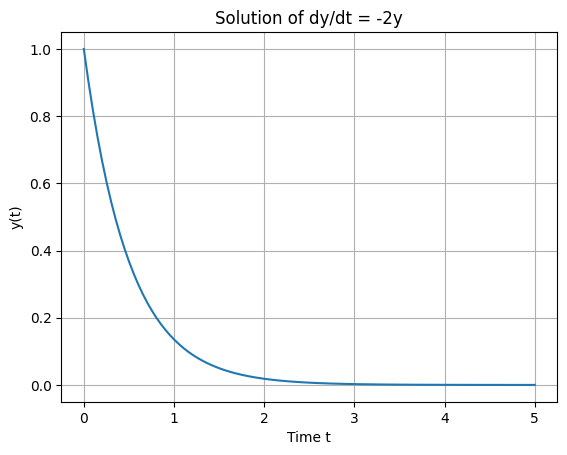

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the differential equation
def dydt(t, y):
    return -2 * y

# Time span and initial condition
t_span = (0, 5)           # Time from 0 to 5
y0 = [1]                  # Initial condition y(0) = 1

# Solve the ODE
solution = solve_ivp(dydt, t_span, y0, t_eval=np.linspace(0, 5, 100))

# Plot the solution
plt.plot(solution.t, solution.y[0])
plt.xlabel('Time t')
plt.ylabel('y(t)')
plt.title('Solution of dy/dt = -2y')
plt.grid(True)
plt.show()

Euler's Method 

RK2

RK4



# Week 5

## Newton's Method

Newton Step - Convvergence rate

In [ ]:
def newtown(f, x0, tol=1e-8, max_iter=100):
    for i in range(max_iter):
        fx = f(x0)
        dfx = (f(x0 + tol) - f(x0)) / tol
        x1 = x0 - fx / dfx
        if abs(x1 - x0) < tol:
            return x1
        x0 = x1
    raise ValueError("Fails to converge.")

## Jacobian Matrix

In [ ]:
def multi_newton(F, J, x0, tol=1e-10, max_iter=100):
    for i in range(max_iter):
        fx = F(x0)
        dfx = J(x0)
        x1 = x0 - np.linalg.solve(dfx, fx)
        if np.linalg.norm(x1 - x0) < tol:
            return x1
        x0 = x1
    raise ValueError("Fails to converge.")

In [ ]:
from collections import deque

def solution(A, B):
    N = len(A)
    M = N + 1
    in_degree  = [0] * M
    out_degree = [0] * M
    for u, v in zip(A, B):
        out_degree[u] += 1
        in_degree[v]  += 1
    # Find Judge Method
    potential = False
    for city in range(M):
        if out_degree[city] == 0:
            if in_degree[city] == M - 1:
                return city
            if potential:
                return -1
            potential = city
    if not potential:
        return -1
    # BFS
    rev = [[] for _ in range(M)]
    for u, v in zip(A, B):
        rev[v].append(u)
    seen = [False] * M
    q = deque([potential])
    seen[potential] = True
    cnt = 1
    while q:
        v = q.popleft()
        for w in rev[v]:
            if not seen[w]:
                seen[w] = True
                cnt += 1
                q.append(w)
    return potential if cnt == M else -1

## PDE

### Difusion Euqation

$$
\boxed{\kappa = \frac{k}{\rho\,c}\quad\bigl[\mathrm{m}^2/\mathrm{s}\bigr]}
$$

#### 1D Metal Bar

$$
\frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial x^2}
$$


#### 3D Metal Cube
$$
\frac{\partial T}{\partial t} = \kappa \left( \frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} + \frac{\partial^2 T}{\partial z^2} \right) 
$$
$$
\frac{\partial T}{\partial t} = \kappa \nabla^2 T
$$
$$
\nabla : Laplacion
$$ 


### FTCS

Central Differance
$$
T_i^{n+1} = T_i^n + r \left( T_{i+1}^n - 2T_i^n + T_{i-1}^n \right)
$$

$$
accuracy =  \mathcal{O}(\Delta x^2)
$$

$$
\frac{\partial T}{\partial x} \Big|{x_i} \approx \frac{T_{i+1} - 2T_i + T_{i-1}}{\Delta x^2}
$$

second-order central difference Laplacian matrix
$$
\mathbf{T} =
\begin{bmatrix}
T_0 \\
T_1 \\
T_2 \\
\vdots \\
T_{n-1}
\end{bmatrix}
$$
$$
L =
\begin{bmatrix}
-2 & 1 & 0 & \cdots & 0 \\
1 & -2 & 1 & \cdots & 0 \\
0 & 1 & -2 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & \cdots & 0 & 1 & -2
\end{bmatrix},
$$
$$
A = \frac{\kappa}{(\Delta x)^2}\;L.
$$
$$

$$

### Wave Equation

# Week 8

Vector Space
Matrix Space
Subspace

## Subspace
$
\mathbf{0}_V \in W
$

$
若 \mathbf{u}\in W 且 \mathbf{v}\in W，则 \mathbf{u} + \mathbf{v} \in W
$

$
若 \alpha \in \mathbb{R} 且 \mathbf{u} \in W，则 \alpha \mathbf{u} \in W
$

$
A \;=\;
\begin{pmatrix}
1 & 0\\
4 & 3\\
2 & 3
\end{pmatrix}
\in M_{3\times2}(\mathbb{R})
$

## Null Space
basis

In [ ]:
import numpy as np
from scipy.linalg import null_space

# 定义一个 2×2 矩阵
A = np.array([[1, 2, 2, 4],
              [3, 8, 6, 16]])

# 计算零空间
Z = null_space(A)

print("Z =", Z)

Z = [[-0.8 -0.4]
 [ 0.4 -0.8]
 [ 0.4  0.2]
 [-0.2  0.4]]


# Week 9